# Tyler Wright
_I pledge my honor that I have abided by the Stevens Honor System._

Resources Used:
- https://realpython.com/knn-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
- https://pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/ 

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import torch.optim as optim

In [2]:
# fname is path to labels.csv
def load_dataset(fname):
    data = np.genfromtxt(fname, dtype=['|S19', '<f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    i = 0
    while(i < len(data)):
        if not (data['probability'][i] == 0.0 or data['probability'][i] == 1.0):
            data = np.delete(data, i)
            i -= 1
        i += 1
    
    image_fnames = np.char.decode(data['path'])
    probs = data['probability']
    types = np.char.decode(data['type'])

    def load_cell_image(fname):
        
        with Image.open(fname) as image:
            return np.asarray(image)

    dir = os.path.dirname(fname)

    images = np.array([load_cell_image(os.path.join(dir, fn))
                       for fn in image_fnames])

    return images, probs, types

In [3]:
images, probs, types = load_dataset("labels.csv")
images = images.reshape((images.shape[0], 300*300))

In [4]:
(trainX, testX, trainY, testY) = train_test_split(images, probs, test_size=.2)

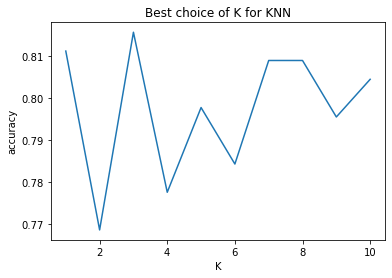

accuracy is best using k=3 at accuracy of 0.8157303370786517


In [47]:
# testing with various values of K
iX, iY = [], []
acc = 0
index = 0
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=10, )
    model.fit(trainX, trainY)
    iY.append(model.score(testX, testY))
    if iY[k-1] > acc:
        acc = iY[k-1]
        index = k-1
    iX.append(k)
    
plt.plot(iX, iY)
plt.title("Best choice of K for KNN")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()
print(f"accuracy is best using k={index+1} at accuracy of {acc}")

In [10]:
model = KNeighborsClassifier(n_neighbors=index+1, n_jobs=10)
model.fit(trainX, trainY)
print(classification_report(testY, model.predict(testX), target_names=["no defect", "defect"]))

              precision    recall  f1-score   support

   no defect       0.82      0.95      0.88       310
      defect       0.81      0.51      0.63       135

    accuracy                           0.82       445
   macro avg       0.81      0.73      0.75       445
weighted avg       0.82      0.82      0.80       445



In [26]:
import torch
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
densenet = models.densenet161(pretrained=True)
inception = models.inception_v3(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet = models.mnasnet1_0(pretrained=True)

models = [('resnet18', resnet18, []),('alexnet', alexnet, []),('squeezenet', squeezenet, []),('vgg16', vgg16, []),('densenet', densenet, []),
          ('inception', inception, []),('googlenet', googlenet, []),('shufflenet', shufflenet, []),('mobilenet', mobilenet, []),('resnext50_32x4d', resnext50_32x4d, []),
          ('wide_resnet50_2', wide_resnet50_2, []),('mnasnet', mnasnet, [])]

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\squeezenet1_0-b66bff10.pth


  0%|          | 0.00/4.78M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\shufflenetv2_x1-5666bf0f80.pth


  0%|          | 0.00/8.79M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\resnext50_32x4d-7cdf4587.pth


  0%|          | 0.00/95.8M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\wide_resnet50_2-95faca4d.pth


  0%|          | 0.00/132M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/mnasnet1.0_top1_73.512-f206786ef8.pth" to C:\Users\twrig/.cache\torch\hub\checkpoints\mnasnet1.0_top1_73.512-f206786ef8.pth


  0%|          | 0.00/16.9M [00:00<?, ?B/s]

In [69]:
class solar_cell_dataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, rgb = True):
        self.labels = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.rbg = rgb

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.img_dir, self.labels.iloc[idx, 0])
        img = Image.open(img_name)

        print(torch.tensor(self.labels.iloc[idx, 1:]))
        target = torch.tensor(self.labels.iloc[idx, 1:])
        target = target.type(torch.FloatTensor)

        if self.transform:
          img = self.transform(img)
        if self.rbg:
          img = img.repeat(3, 1, 1)

        return img, target

In [62]:
import torch.nn as nn
class transfer_learner(nn.Module):
  def __init__(self):
    super(transfer_learner, self).__init__()
    self.fc1 = nn.Linear(1000, 128)
    self.fc2 = nn.Linear(128, 2)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [63]:
######### HYPER PARAMS ###########
batch_size = 64
cores = 0 #-1
lr = .01
momentum = .6
epochs = 100
################################
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [73]:
from torchvision.transforms.transforms import RandomApply
import torchvision.transforms as T

transforms = T.Compose([
    T.ToTensor(),
    T.RandomApply(nn.ModuleList([T.RandomAffine(degrees = (0, 30), translate = (0.1, 0.2), scale = (0.5, 1))]), p=.2)
])

s = solar_cell_dataset(csv_file='train', img_dir='', transform=transforms)
t = solar_cell_dataset(csv_file='test', img_dir='', transform=ToTensor())

train_loader = DataLoader(s,
                          batch_size=batch_size,
                          num_workers=cores)
test_loader = DataLoader(t,
                         batch_size=batch_size,
                         num_workers=cores)

In [74]:
print(s.__getitem__(0)[0].shape)

tensor([0, 1])
torch.Size([3, 300, 300])


In [75]:
s_ = nn.Softmax(dim=1)
def classify(x):
  x = s_(x)
  x = torch.argmax(x, dim=1)
  return x

In [ ]:
loss_criterion = nn.CrossEntropyLoss()

for name, model, test_acc in models:
  for param in model.parameters():
    param.requires_grad = False
  transfer = transfer_learner()

  net = nn.Sequential(model, transfer)
  net.to(device)
  optimizer = optim.SGD(net.parameters(), lr = lr, momentum = momentum)

  for epoch in range(epochs):
    t_loss = 0
    acc = 0
    with torch.enable_grad():
      for idx, data in enumerate(train_loader):
        img, target = data
        img, target = img.to(device), target.to(device)

        optimizer.zero_grad()

        output = net(img)
        loss = loss_criterion(output, target)
        t_loss += loss.item()
        acc += (classify(output) == torch.argmax(target, dim=1)).float().sum()
    accuracy = 100 * acc / (len(s))
    print(f'[{epoch}], loss : {t_loss:.3f}, accuracy : {accuracy:.3f}%')

    if (epoch + 1) % 9 == 0:
      acc = 0
      with torch.no_grad():
        for idx, data in enumerate(test_loader):
          img, target = data
          img, target = img.to(device), target.to(device)

          output = net(img)
          acc += (classify(output) == torch.argmax(target, dim=1)).float().sum()
      accuracy = 100 * acc / (len(t))
      test_acc.append(accuracy)   
      print('======================================================')
      print(f'[{epoch}], TEST accuracy : {accuracy:.3f}%')
      print('======================================================')
  print(torch.cuda.memory_allocated())
  del net
  print(torch.cuda.memory_allocated())

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1,

tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
[11], loss : 18.309, accuracy : 65.073%
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])


tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
[17], TEST accuracy : 63.371%
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1,

tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0,

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1, 0])
tensor([1,